<a href="https://colab.research.google.com/github/seoeunkong/MachineLearning/blob/main/chapter02_%ED%9B%88%EB%A0%A8%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%84%B8%ED%8A%B8_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

#전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
fish_data = np.column_stack((fish_length, fish_weight))
#첫 번째 차원을 따라 배열을 연결하는 np.concatenate() 함수를 사용
fish_target = np.concatenate((np.ones(35), np.zeros(14)))


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
#앞에서 준비했던 데이터로 k-최근접 이웃 알고리즘을 훈련
from sklearn.neighbors import KNeighborsClassifier 

kn = KNeighborsClassifier() 
kn.fit(train_input,train_target) 
kn.score(test_input, test_target)


1.0

In [ ]:
#이 모델에 아까 오류를 일으킨다고 말했던 도미의 데이터를 넣기
print(kn.predict([[25,150]]))

[0.]


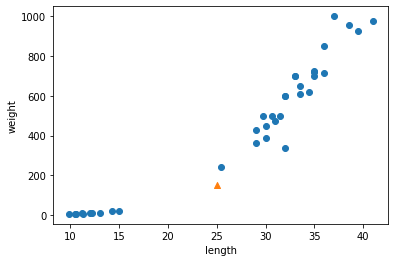

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(train_input[:,0], train_input[:,1]) 
plt.scatter(25,150, marker='^') #marker='^' = 삼각형으로 표시
plt.xlabel('length')
plt.ylabel('weight') 
plt.show()


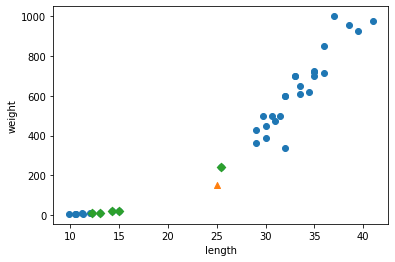

In [ ]:
#이웃까지의 거리와 이웃 샘플의 인덱스를 반환
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1]) 
plt.scatter(25,150, marker='^')
#indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그려보겠다.
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # marker='D'로 지정하면 산점도를 마름모로 그린다. 

plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()


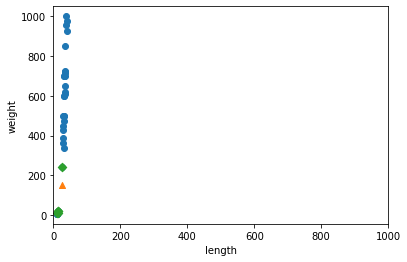

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1]) 
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') 
plt.xlim((0,1000)) # 맷플롯립에서 x 축 범위를 지정하는 함수. 

plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()



In [ ]:
mean = np.mean(train_input, axis=0) # mean() 함수는 평균을 계산한다. 
std = np.std(train_input, axis=0) # std() 함수는 표준편차를 제공한다.

print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std 

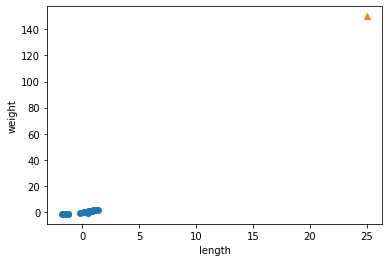

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1]) 
plt.scatter(25,150, marker='^') 
plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()


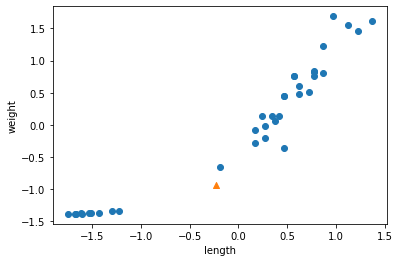

In [ ]:
#샘플(주황색 삼각형)도 동일한 비율로 전환하기
new = ([25,150] - mean) / std 

plt.scatter(train_scaled[:,0], train_scaled[:,1]) 
plt.scatter(new[0],new[1], marker='^') 

plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()


In [ ]:
kn.fit(train_scaled, train_target) #훈련
test_scaled = (test_input - mean) / std # test_input 도 표준점수와 동일한 비율로 바꿔줘야 한다.

kn.score(test_scaled, test_target) #평가


1.0

In [ ]:
print(kn.predict([new])) #수상한 생선을 다시 평가하면 도미로 알맞게 나옴!

[1.]


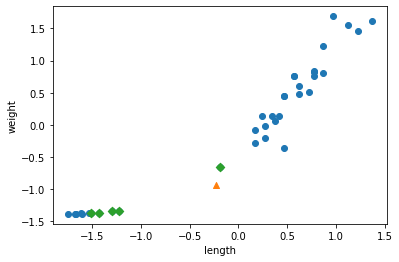

In [ ]:
#산점도 다시 출력
plt.scatter(train_scaled[:,0], train_scaled[:,1]) 
plt.scatter(new[0], new[1], marker='^') 
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D') 

plt.xlabel('length') 
plt.ylabel('weight') 
plt.show()

